# **PROJECT 10 (B): RFM (Recency Frequency Monetary) Analysis**
---
RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries

RFM stands for the three dimensions:

* Recency – How recently did the customer purchase?
* Frequency – How often do they purchase?
* Monetary Value – How much do they spend?

Before starting RFM analysis we need to set objective and outcome of analysis.

[Tham khảo chi tiết về phân tích RFM](https://bsdinsight.com/phan-tich-phan-khuc-khach-hang-voi-mo-hinh-rfm/)

[link code Kaggle](https://www.kaggle.com/aainabajaj/data-insights-with-rfm-analysis)

# A| ĐỌC VÀ KHÁM PHÁ TẬP DỮ LIỆU
---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pp
import seaborn as sns
%matplotlib inline

In [ ]:
#Liên kết với Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path = "/content/drive/My Drive/Colab Notebooks/10Project/Data10_RFM Analysis/sales_data_sample.csv"
data =pd.read_csv(path, encoding="ISO-8859-1")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [ ]:
#Hàm kiểm tra missing 
def missing_data(data):
    total = data.isnull().sum()
    percent = round((data.isnull().sum()/data.isnull().count()*100),2)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [ ]:
missing_data(data)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2521,0,1486,76,0,1074,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89.3,0,52.64,2.69,0,38.04,0,0,0
Types,int64,int64,float64,int64,float64,object,object,int64,int64,int64,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,object


## 1) Chuẩn hóa dữ liệu
---
Loại bỏ và xử lý dữ liệu của các cột trong file Dữ liệu

**Quick Insight**

We have some unnecessary columns 'ADDRESSLINE1','ADDRESSLINE2','POSTALCODE', 'TERRITORY', 'PHONE'. We can drop them. We can discretize data i.e. Instead of using 'CITY' , 'STATE' can use 'COUNTRY' only. So, we can drop 'CITY' , 'STATE' also. We can regroup column 'PRODUCTCODE' by using only first three character value. We have 'CUSTOMERNAME', 'CONTACTFIRSTNAME' and 'CONTACTLASTNAME'. We can remove 'CONTACTFIRSTNAME' and 'CONTACTLASTNAME'.

In [ ]:
# Xóa các cột ko cần thiết
temp=['ADDRESSLINE1','ADDRESSLINE2','POSTALCODE', 'TERRITORY', 'PHONE', 'CITY' , 'STATE','CONTACTFIRSTNAME', 'CONTACTLASTNAME' ]
data.drop(temp,axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   PRICEEACH        2823 non-null   float64
 3   ORDERLINENUMBER  2823 non-null   int64  
 4   SALES            2823 non-null   float64
 5   ORDERDATE        2823 non-null   object 
 6   STATUS           2823 non-null   object 
 7   QTR_ID           2823 non-null   int64  
 8   MONTH_ID         2823 non-null   int64  
 9   YEAR_ID          2823 non-null   int64  
 10  PRODUCTLINE      2823 non-null   object 
 11  MSRP             2823 non-null   int64  
 12  PRODUCTCODE      2823 non-null   object 
 13  CUSTOMERNAME     2823 non-null   object 
 14  COUNTRY          2823 non-null   object 
 15  DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(7), object(7)
memory usage: 353.0+ KB


In [ ]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,COUNTRY,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,USA,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,France,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,France,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,USA,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,USA,Medium


In [ ]:
#Cột PRODUCTCODE chỉ lấy 3 ký tự đầu tiên
data['PRODUCTINITIAL'] = data['PRODUCTCODE'].str[:3]
data.drop('PRODUCTCODE',axis=1,inplace=True)
data.head()

In [ ]:
30*95.7

2871.0

In [ ]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,COUNTRY,DEALSIZE,PRODUCTINITIAL
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,Land of Toys Inc.,USA,Small,S10
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,Reims Collectables,France,Small,S10
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,Lyon Souveniers,France,Medium,S10
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,Toys4GrownUps.com,USA,Medium,S10
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,Corporate Gift Ideas Co.,USA,Medium,S10


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   PRICEEACH        2823 non-null   float64
 3   ORDERLINENUMBER  2823 non-null   int64  
 4   SALES            2823 non-null   float64
 5   ORDERDATE        2823 non-null   object 
 6   STATUS           2823 non-null   object 
 7   QTR_ID           2823 non-null   int64  
 8   MONTH_ID         2823 non-null   int64  
 9   YEAR_ID          2823 non-null   int64  
 10  PRODUCTLINE      2823 non-null   object 
 11  MSRP             2823 non-null   int64  
 12  CUSTOMERNAME     2823 non-null   object 
 13  COUNTRY          2823 non-null   object 
 14  DEALSIZE         2823 non-null   object 
 15  PRODUCTINITIAL   2823 non-null   object 
dtypes: float64(2), int64(7), object(7)
memory usage: 353.0+ KB


## 2) Trực quan hóa các cột dữ liệu để lấy thông tin hữu ích
---

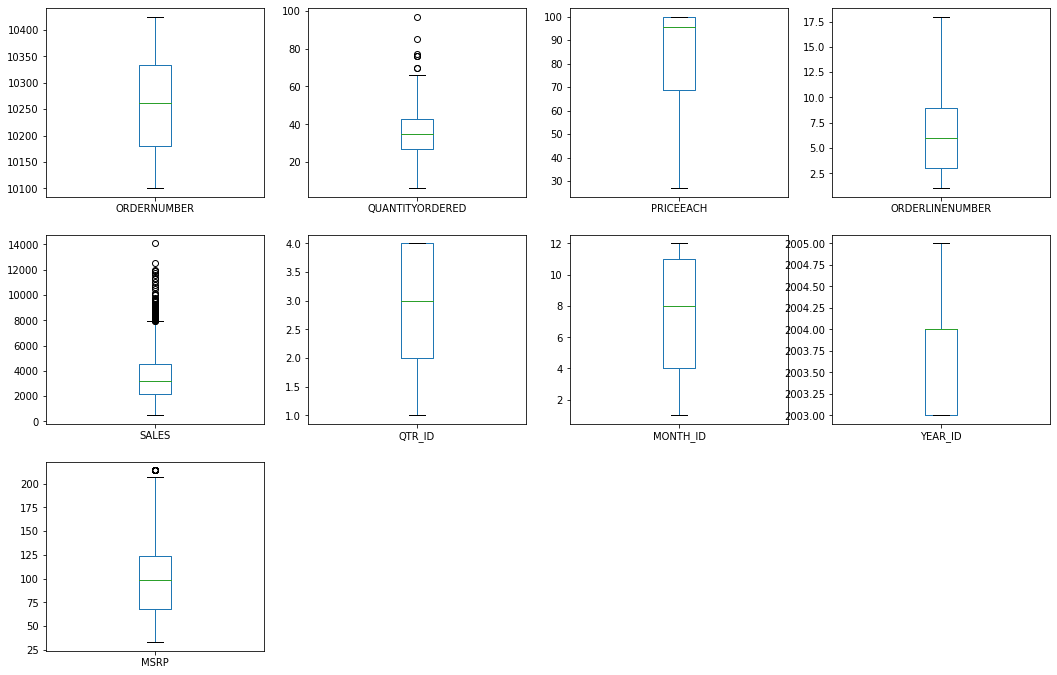

In [ ]:
plt.rcParams['figure.figsize'] = [18, 16]
data.plot(kind="box",subplots=True,layout=(4,4),sharex=False,sharey=False)
plt.show()

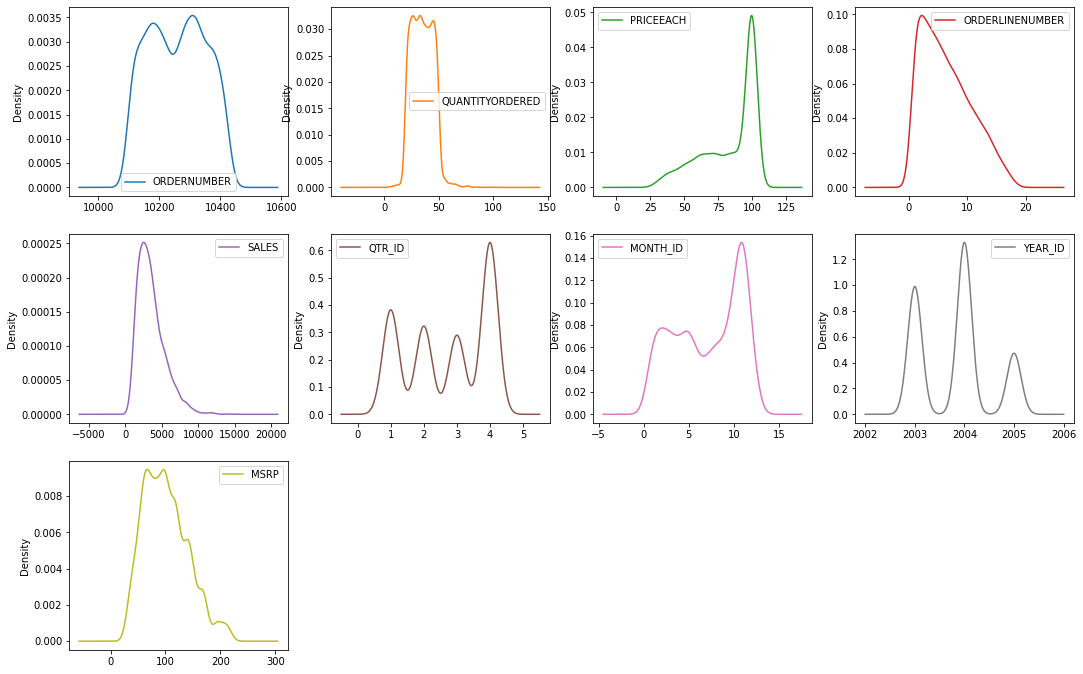

In [ ]:
plt.rcParams['figure.figsize'] = [18, 16]
data.plot(kind="density",subplots=True,layout=(4,4),sharex=False,sharey=False)
plt.show()

In [ ]:
data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


### **NHẬN XÉT:**
---
* Hầu hết dữ liệu bán hàng tập trung trong năm 2003, 2004 (YEAR_ID); Quý 4 bán nhiều hơn các quý khác...4>1>2>3
* Từ biểu đồ cho thấy, doanh số bán hàng (SALES) nằm trong một khoảng cụ thể. Tuy nhiên, có một số trường hợp ngoại lai xuất hiện trong dữ liệu SALES và QUANTITYORDERED.
* Trong dữ liệu có các cột dữ liệu bị lệch 'PRICEEACH, OREDRLINENUMBER
* Có một số cột có phương sai lớn: PRICEEACH, ORDERLINENUMBER và MSRP

## 3) Phân tích dữ liệu chi tiết
---

In [ ]:
#kiểm tra dữ liệu null
data.isnull().sum()

ORDERNUMBER        0
QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
CUSTOMERNAME       0
COUNTRY            0
DEALSIZE           0
PRODUCTINITIAL     0
dtype: int64

In [ ]:
#Check dữ liệu duplicate
data.duplicated().any()

False

In [ ]:
#Xác định số khách hàng khách nhau có trong tập dữ liệu
data.CUSTOMERNAME.value_counts()

Euro Shopping Channel           259
Mini Gifts Distributors Ltd.    180
Australian Collectors, Co.       55
La Rochelle Gifts                53
AV Stores, Co.                   51
                               ... 
Microscale Inc.                  10
Royale Belge                      8
Auto-Moto Classics Inc.           8
Atelier graphique                 7
Boards & Toys Co.                 3
Name: CUSTOMERNAME, Length: 92, dtype: int64

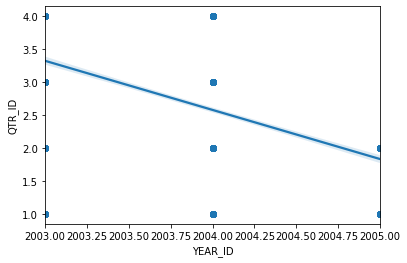

In [ ]:
plt.rcParams['figure.figsize'] = [6, 4]
sns.regplot(x="YEAR_ID",y="QTR_ID",data=data)
plt.show()

### **NHẬN XÉT:**
---
* Các cột dữ liệu không chứa giá trị NULL
* Không có bản ghi nào bị duplicate
* Có tổng số 92 khách hàng khác nhau trong tập dữ liệu
* Giá trị MONTH_ID bỏ qua vì có thể sử dụng dữ liệu QTR_ID để thay thế.

In [ ]:
#Thống kê dữ liệu theo tình trạng xử lý đơn hàng
data['STATUS'].value_counts()


Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

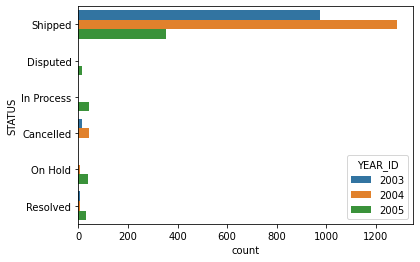

In [ ]:
#Trực quan hóa dữ liệu STATUS theo Năm
sns.countplot(y='STATUS',data=data,hue='YEAR_ID')

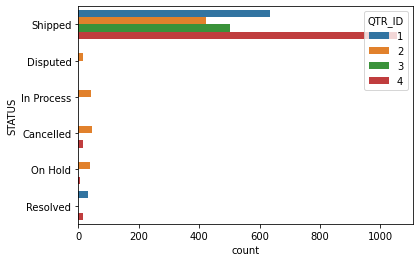

In [ ]:
#Trực quan hóa dữ liệu STATUS theo Quý (QTR_ID)
sns.countplot(y='STATUS',data=data,hue='QTR_ID')


In [ ]:
# Comparing sales for each year(Quaterwise)

data1=data.groupby(['YEAR_ID','QTR_ID']).agg({'SALES': lambda x: x.sum() })
print(data1.info())
print(data1.head(12))

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10 entries, (2003, 1) to (2005, 2)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SALES   10 non-null     float64
dtypes: float64(1)
memory usage: 267.0 bytes
None
                     SALES
YEAR_ID QTR_ID            
2003    1        445094.69
        2        562365.22
        3        649514.54
        4       1860005.09
2004    1        833730.68
        2        766260.73
        3       1109396.27
        4       2014774.92
2005    1       1071992.36
        2        719494.35


In [ ]:
data1.reset_index(inplace=True)
data1

,YEAR_ID,QTR_ID,SALES
0,2003,1,445094.69
1,2003,2,562365.22
2,2003,3,649514.54
3,2003,4,1860005.09
4,2004,1,833730.68
5,2004,2,766260.73
6,2004,3,1109396.27
7,2004,4,2014774.92
8,2005,1,1071992.36
9,2005,2,719494.35


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


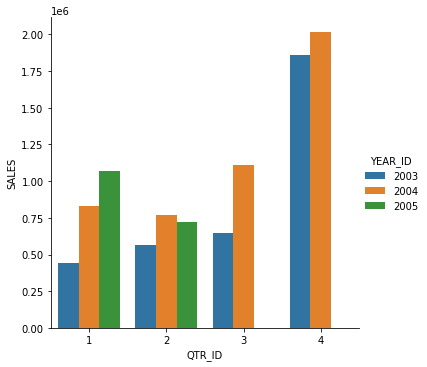

In [ ]:
sns.factorplot(y='SALES', x='QTR_ID',data=data1,kind="bar" ,hue='YEAR_ID')

# B| PHÂN TÍCH RFM
---

Để phân tích RFM chúng ta sẽ quan tâm tới dữ liệu của 3 cột:
* CUSTOMERNAME
* ORDERNUMBER
* ORDERDATE
* SALES 


## 1) Chuẩn bị dữ liệu RFM
---

In [ ]:
temp=['CUSTOMERNAME', 'ORDERNUMBER', 'ORDERDATE', 'SALES']
RFM_data=data[temp]
RFM_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CUSTOMERNAME  2823 non-null   object 
 1   ORDERNUMBER   2823 non-null   int64  
 2   ORDERDATE     2823 non-null   object 
 3   SALES         2823 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 88.3+ KB


In [ ]:
RFM_data.head()

,CUSTOMERNAME,ORDERNUMBER,ORDERDATE,SALES
0,Land of Toys Inc.,10107,2/24/2003 0:00,2871.00
1,Reims Collectables,10121,5/7/2003 0:00,2765.90
2,Lyon Souveniers,10134,7/1/2003 0:00,3884.34
3,Toys4GrownUps.com,10145,8/25/2003 0:00,3746.70
4,Corporate Gift Ideas Co.,10159,10/10/2003 0:00,5205.27


In [ ]:
#Xử lý dữ liệu datetime
RFM_data['ORDERDATE'] = pd.to_datetime(RFM_data['ORDERDATE'])
RFM_data['ORDERDATE'].max()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Timestamp('2005-05-31 00:00:00')

In [ ]:
#Xât dựng bảng RFM: Lấy ngày cuối cùng 31/05/2005 để tính giá trị Recency
import datetime as dt
now = dt.datetime(2005,5,31)


In [ ]:
RFM_table=RFM_data.groupby('CUSTOMERNAME').agg({'ORDERDATE': lambda x: (now - x.max()).days, # Recency
                                                'ORDERNUMBER': lambda x: len(x.unique()), # Frequency
                                                'SALES': lambda x: x.sum()})    # Monetary 

In [ ]:
RFM_table['ORDERDATE'] = RFM_table['ORDERDATE'].astype(int)

RFM_table.rename(columns={'ORDERDATE': 'recency', 
                         'ORDERNUMBER': 'frequency',
                         'SALES': 'monetary_value'}, inplace=True)

In [ ]:
RFM_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, AV Stores, Co. to giftsbymail.co.uk
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   recency         92 non-null     int64  
 1   frequency       92 non-null     int64  
 2   monetary_value  92 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 2.9+ KB


In [ ]:
RFM_table.head()

,recency,frequency,monetary_value
CUSTOMERNAME,,,
"AV Stores, Co.",195,3,157807.81
Alpha Cognac,64,3,70488.44
Amica Models & Co.,264,2,94117.26
"Anna's Decorations, Ltd",83,4,153996.13
Atelier graphique,187,3,24179.96


In [ ]:
# Nhóm RFM theo group
quantiles = RFM_table.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary_value
0.25,80.25,2.0,70129.4325
0.50,185.00,3.0,86522.6100
0.75,229.25,3.0,120575.8750


In [ ]:
# Converting quantiles to a dictionary, easier to use.
quantiles = quantiles.to_dict()
quantiles 

{'frequency': {0.25: 2.0, 0.5: 3.0, 0.75: 3.0},
 'monetary_value': {0.25: 70129.4325, 0.5: 86522.61, 0.75: 120575.875},
 'recency': {0.25: 80.25, 0.5: 185.0, 0.75: 229.25}}

## 2) Phân khúc khách hàng với RFM
---

In [ ]:
RFM_Segment = RFM_table.copy()

In [ ]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FM_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [ ]:
RFM_Segment['R_Quartile'] = RFM_Segment['recency'].apply(R_Class, args=('recency',quantiles,))
RFM_Segment['F_Quartile'] = RFM_Segment['frequency'].apply(FM_Class, args=('frequency',quantiles,))
RFM_Segment['M_Quartile'] = RFM_Segment['monetary_value'].apply(FM_Class, args=('monetary_value',quantiles,))

In [ ]:
RFM_Segment['RFMClass'] = RFM_Segment.R_Quartile.map(str) \
                            + RFM_Segment.F_Quartile.map(str) \
                            + RFM_Segment.M_Quartile.map(str)

In [ ]:
RFM_Segment.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
"AV Stores, Co.",195,3,157807.81,2,2,4,224
Alpha Cognac,64,3,70488.44,4,2,2,422
Amica Models & Co.,264,2,94117.26,1,1,3,113
"Anna's Decorations, Ltd",83,4,153996.13,3,4,4,344
Atelier graphique,187,3,24179.96,2,2,1,221


**RFM segmentation readily answers these questions for your business…**

1. Who are my best customers?
2. Which customers are at the verge of churning?
3. Who are lost customers that you don’t need to pay much attention to?
4. Who are your loyal customers?
5. Which customers you must retain?
6. Who has the potential to be converted in more profitable customers?
7. Which group of customers is most likely to respond to your current campaign?


In [ ]:
#Thống kê theo từng nhóm:
RFM_Segment['RFMClass'].value_counts()

111    13
444     9
422     7
323     7
344     6
113     4
222     4
321     4
112     4
224     4
423     3
322     3
223     3
212     3
443     2
242     2
211     2
213     2
221     1
123     1
244     1
124     1
424     1
421     1
341     1
243     1
311     1
324     1
Name: RFMClass, dtype: int64

In [ ]:
#Who are my best customers? (BY RFMClass = 444)
RFM_Segment[RFM_Segment['RFMClass']=='444'].sort_values('monetary_value', ascending=False).head(10)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
Euro Shopping Channel,0,26,912294.11,4,4,4,444
Mini Gifts Distributors Ltd.,2,17,654858.06,4,4,4,444
La Rochelle Gifts,0,4,180124.90,4,4,4,444
The Sharp Gifts Warehouse,39,4,160010.27,4,4,4,444
Souveniers And Things Co.,2,4,151570.98,4,4,4,444
Salzburg Collectables,14,4,149798.63,4,4,4,444
Danish Wholesale Imports,46,5,145041.60,4,4,4,444
Reims Collectables,62,5,135042.94,4,4,4,444
Diecast Classics Inc.,1,4,122138.14,4,4,4,444


In [ ]:
#Which customers are at the verge of churning?
#Customers who's recency value is low

RFM_Segment[RFM_Segment['R_Quartile'] <= 2 ].sort_values('monetary_value', ascending=False).head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
Land of Toys Inc.,197,4,164069.44,2,4,4,244
"AV Stores, Co.",195,3,157807.81,2,2,4,224
"Saveley & Henriot, Co.",455,3,142874.25,1,2,4,124
Rovelli Gifts,200,3,137955.72,2,2,4,224
Online Diecast Creations Co.,208,3,131685.30,2,2,4,224


In [ ]:
#Who are lost customers?
#Customers who's recency, frequency as well as monetary values are low 

RFM_Segment[RFM_Segment['RFMClass']=='111'].sort_values('recency',ascending=False).head(15)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
"Men 'R' US Retailers, Ltd.",508,2,48048.46,1,1,1,111
"Double Decker Gift Stores, Ltd",495,2,36019.04,1,1,1,111
West Coast Collectables Co.,488,2,46084.64,1,1,1,111
Signal Collectibles Ltd.,476,2,50218.51,1,1,1,111
Daedalus Designs Imports,465,2,69052.41,1,1,1,111
CAF Imports,438,2,49642.05,1,1,1,111
Osaka Souveniers Co.,413,2,67605.07,1,1,1,111
Cambridge Collectables Co.,388,2,36163.62,1,1,1,111
Online Mini Collectables,263,2,57197.96,1,1,1,111


In [ ]:
#Who are your loyal customers?
#Customers with high frequency value

RFM_Segment[RFM_Segment['F_Quartile'] >= 3 ].sort_values('monetary_value', ascending=False).head(10)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
Euro Shopping Channel,0,26,912294.11,4,4,4,444
Mini Gifts Distributors Ltd.,2,17,654858.06,4,4,4,444
"Australian Collectors, Co.",183,5,200995.41,3,4,4,344
Muscle Machine Inc,181,4,197736.94,3,4,4,344
La Rochelle Gifts,0,4,180124.90,4,4,4,444
"Dragon Souveniers, Ltd.",90,5,172989.68,3,4,4,344
Land of Toys Inc.,197,4,164069.44,2,4,4,244
The Sharp Gifts Warehouse,39,4,160010.27,4,4,4,444
"Anna's Decorations, Ltd",83,4,153996.13,3,4,4,344
